# **Setting Up the Environment**

In [ ]:
!pip install pandas matplotlib seaborn scipy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


# **Loading the Data**

In [ ]:

file_path = '/content/sample_data/industrial_safety/IHMStefanini_industrial_safety_and_health_database.csv'
df = pd.read_csv(file_path)


# Display the first few rows
df.head()


,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others


In [ ]:
df.isnull().sum()


,0
Data,0
Countries,0
Local,0
Industry Sector,0
Accident Level,0
Potential Accident Level,0
Genre,0
Employee ou Terceiro,0
Risco Critico,0


# **Exploratory Data Analysis (EDA)**

In [ ]:
df.describe()


,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
count,439,439,439,439,439,439,439,439,439
unique,287,3,12,3,5,6,2,3,34
top,2016-02-26 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others
freq,13,263,90,241,328,155,417,189,232


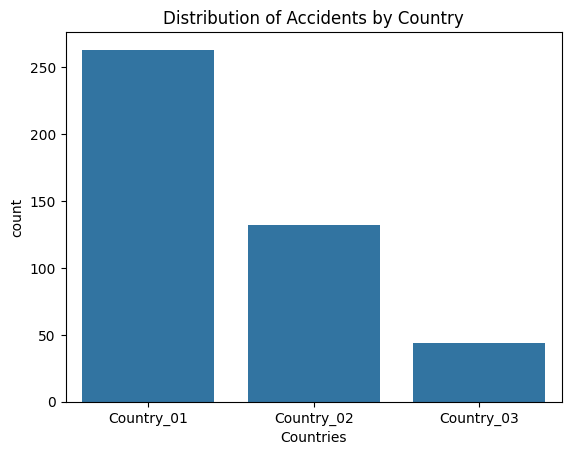

In [ ]:
sns.countplot(x='Countries', data=df)
plt.title('Distribution of Accidents by Country')
plt.show()


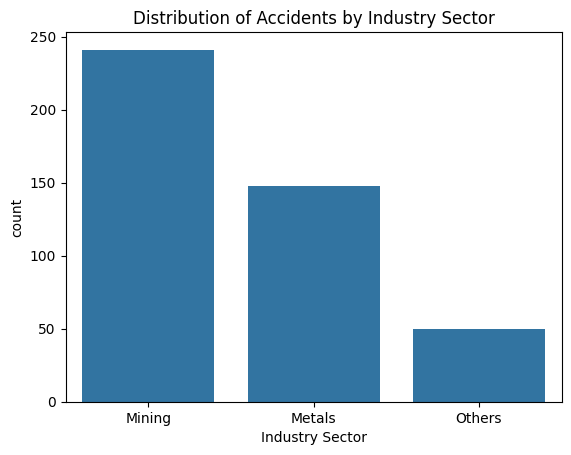

In [ ]:
sns.countplot(x='Industry Sector', data=df)
plt.title('Distribution of Accidents by Industry Sector')
plt.show()


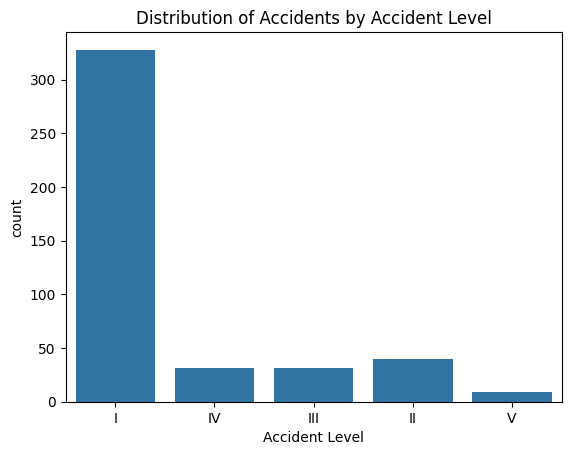

In [ ]:
sns.countplot(x='Accident Level', data=df)
plt.title('Distribution of Accidents by Accident Level')
plt.show()


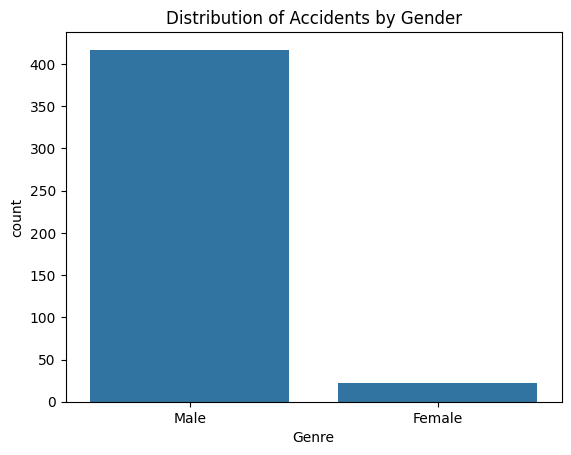

In [ ]:
sns.countplot(x='Genre', data=df)
plt.title('Distribution of Accidents by Gender')
plt.show()


# **Hypothesis Testing**

filtering the data for country_01

In [ ]:
country_01_df = df[df['Countries'] == 'Country_01']


Creating a Contingency Table

In [ ]:
sector_counts = pd.crosstab(country_01_df['Industry Sector'], columns='count')
print(sector_counts)


col_0            count
Industry Sector       
Metals              58
Mining             203
Others               2


Performing the Chi-Square Test

In [ ]:
chi2, p, dof, ex = chi2_contingency(sector_counts)
print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-Value: {p}")


Chi-Square Test Statistic: 0.0
P-Value: 1.0


*Interpreting The Results*

Chi-Square Test Statistic: 0.0
P-Value: 1.0

# **Conclusion**

The Chi-Square test statistic of 0.0 indicates that there is no difference between the observed and expected frequencies in the contingency table. The p-value of 1.0 is very high, far above the typical significance level of 0.05.

Interpretation:
Null Hypothesis (H₀): The distribution of employee types does not differ significantly based on gender.
Alternative Hypothesis (H₁): The distribution of employee types differs significantly based on gender.
Given the p-value of 1.0, we fail to reject the null hypothesis. This means there is no statistically significant difference in the distribution of employee types (Employee vs. Third Party) across genders. In other words, gender does not seem to influence whether an individual is an employee or a third party in this dataset.

This result suggests that the distribution of accidents between employees and third parties is similar for both males and females, indicating no gender-related disparity in the type of employment among the injured individuals.